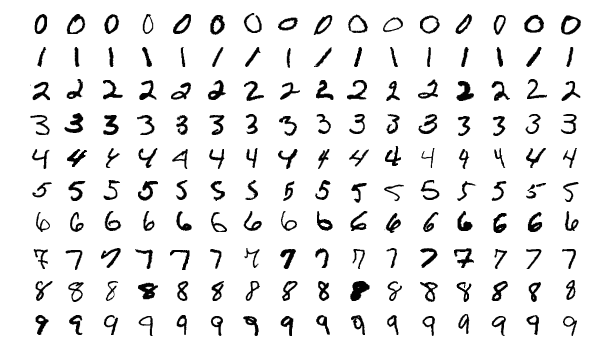

In [ ]:
         
         
              2 3 4 5 6 7 
              4 5 6 7 8 9
              3 2 4 5 6 7 
              2 4 5 6 7 6



In [ ]:
             2 3 4 5 6 7 4 5 6 7 8 9 3 2 4 5 6 7 2 4 5 6 7 6 

In [ ]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms


In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('./', download=True, train=True, transform=transform)
valset = datasets.MNIST('./', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



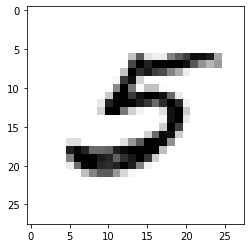

In [ ]:

images, labels = next(iter(trainloader))

plt.imshow(images[0].squeeze().numpy(), cmap='gray_r');

# print(images.shape)
# print(labels.shape)

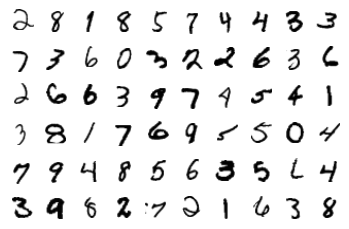

In [ ]:
figure = plt.figure()

for index in range(1, 61):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                      )
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss() # The negative log likelihood loss.
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1) # flattening

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss
print(loss)

tensor(2.3074, grad_fn=<NllLossBackward0>)


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 16
for e in range(epochs):
    running_loss = 0
    correct = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        
        pred = torch.argmax(torch.exp(output), dim=1)
        correct += sum(torch.eq(pred, labels))

        loss = criterion(output, labels)
        running_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
    else:
        print(f"Epoch {e} - Training loss: {running_loss/len(trainloader)} Accuracy: {correct/len(trainset)}%")



Epoch 0 - Training loss: 0.3518685773253314 Accuracy: 0.8969166874885559%
Epoch 1 - Training loss: 0.25649120637984163 Accuracy: 0.9235333204269409%
Epoch 2 - Training loss: 0.2022895101449891 Accuracy: 0.9404666423797607%
Epoch 3 - Training loss: 0.1689200220720918 Accuracy: 0.94964998960495%
Epoch 4 - Training loss: 0.1426834824707494 Accuracy: 0.9577500224113464%
Epoch 5 - Training loss: 0.12505741845637655 Accuracy: 0.9627666473388672%
Epoch 6 - Training loss: 0.10966993222878908 Accuracy: 0.9673666954040527%
Epoch 7 - Training loss: 0.09951121219272997 Accuracy: 0.9703333377838135%
Epoch 8 - Training loss: 0.08898839229511331 Accuracy: 0.9728833436965942%
Epoch 9 - Training loss: 0.08046184250090056 Accuracy: 0.9756333231925964%
Epoch 10 - Training loss: 0.07269948976425164 Accuracy: 0.9785333275794983%
Epoch 11 - Training loss: 0.06709121754750419 Accuracy: 0.9802666902542114%
Epoch 12 - Training loss: 0.06161916590601539 Accuracy: 0.9813833236694336%
Epoch 13 - Training loss: 0.

Predicted Digit = 4


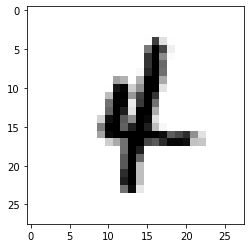

In [ ]:
images, labels = next(iter(valloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
